# Лабораторная работа №1. EDA

In [91]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [92]:
data = pd.read_csv("data_sets/neo_task.csv")

### Исследование исходных данных

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB



### Датасет содержит следующие поля:
* `id` - идентификатор
* `name` - название
* `est_diameter_min` - минимальный расчетный диаметр
* `est_diameter_max` - максимальный расчетный диаметр
* `relative_velocity` - относительная скорость
* `miss_distance` - дистанция пролета / минимальная дистанция
* `absolute_magnitude` - абсолютная звездная величина
* `hazardous` - опасность




In [94]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.026600e+04,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,1.438528e+07,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,2.087357e+07,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448595e+06,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,3.748364e+06,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [95]:
data.head(35)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
5,3395961.0,(2007 WU3),0.046191,0.103286,18933.875801,2.847083e+07,23.80,False
6,3826808.0,(2018 PH22),0.116026,0.259442,43184.402732,3.418417e+07,21.80,False
7,3339667.0,(2006 QV89),0.021113,0.047211,38064.802287,2.653154e+07,25.50,False
8,3644044.0,(2013 LL31),0.221083,0.494356,33736.859964,5.670662e+07,20.40,False
9,3655750.0,(2014 AC16),0.242412,0.542051,56188.215588,6.175441e+07,20.20,False



### Получили следующую характеристику исходных данных:
* в столбцах `absolute_magnitude`, `id`, `relative_velocity`, `est_diameter_max`, `name` есть пропуски
* неподходящий тип данных в столбце `id` - тип float необходимо изменить на тип int, так как идентификатор - целое число

### Обработка пропущенных значений

In [96]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

absolute_magnitude    0.753005
id                    0.627505
relative_velocity     0.613193
est_diameter_max      0.503104
name                  0.050641
est_diameter_min      0.000000
miss_distance         0.000000
hazardous             0.000000
dtype: float64

##### Недостающие значение данных в следующих столбцах:
* `absolute_magnitude`
* `id`
* `relative_velocity`
* `est_diameter_max`
* `name`

In [97]:
data["id"].value_counts()

id
2277810.0    43
2469219.0    43
3743123.0    39
3893865.0    38
2138175.0    38
             ..
3730582.0     1
3555046.0     1
3735469.0     1
3754369.0     1
3674178.0     1
Name: count, Length: 27352, dtype: int64

### Предположения для заполнения пропущенных значений:
* Заполнить пропущенные значения в столбце `id` значением моды по данному столбцу
* Заполнить пропущенные значения в столбце `absolute_magnitude` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `relative_velocity` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `est_diameter_max` путем прибавления к `est_diameter_min` (среди которого нет пропусков) среднего значения отклонения `est_diameter_max` от `est_diameter_min`
* Заполнить пропущенные значения в столбце `name` значениями "unknown"

In [98]:
data["id"] = data["id"].fillna(data["id"].mode()[0])
data["absolute_magnitude"] = data["absolute_magnitude"].fillna(data["absolute_magnitude"].mean())
data["relative_velocity"] = data["relative_velocity"].fillna(data["relative_velocity"].mean())

mean_diameter_difference = data["est_diameter_max"].mean() - data["est_diameter_min"].mean()
data["est_diameter_max"] = data["est_diameter_max"].fillna(data["est_diameter_min"] + mean_diameter_difference)
data["name"] = data["name"].fillna(data["name"].mode()[0])



In [99]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

### Обогащение данных
Из столбца `name` можно извлечь информацию о годе наблюдения метеорита.

In [100]:
data["year"] = data["name"].str.extract(r'\(.*?\b(\d{4})\b.*?\)')
data["year"].value_counts()

year
2021    9433
2020    8632
2019    7421
2017    6540
2016    6274
        ... 
1953       1
1968       1
1947       1
1979       1
4788       1
Name: count, Length: 69, dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  float64
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  bool   
 8   year                90831 non-null  object 
dtypes: bool(1), float64(6), object(2)
memory usage: 5.6+ MB


Заполним пропуски в столбце с годом

In [102]:
data["year"] = data["year"].fillna(data["year"].mode()[0])
data["year"].isna().sum()

np.int64(0)

### Коррекция типов данных

In [103]:
data["id"] = data["id"].astype(int)
data["year"] = data["year"].astype(int)
data["hazardous"] = data["hazardous"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  int64  
 8   year                90836 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 6.2+ MB


### Проверка очищенных данных

In [104]:
data.duplicated().sum()

np.int64(0)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  int64  
 8   year                90836 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 6.2+ MB


In [106]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
0,3561024,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,0,2011
1,54016766,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,0,2020
2,3746620,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,0,2016
3,3633054,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,0,2013
4,3742124,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,0,2016


### EDA

Исследование основных параметров

Параметры:

* `est_diameter_min` - минимальный расчетный диаметр
* `est_diameter_max` - максимальный расчетный диаметр
* `relative_velocity` - относительная скорость
* `miss_distance` - дистанция пролета / минимальная дистанция
* `absolute_magnitude` - абсолютная звездная величина
* `hazardous` - опасность


In [107]:
columns = ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]
data.describe()[columns]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284927,48066.003701,3.706655e+07,23.526653
std,0.298511,0.666670,25216.851401,2.235204e+07,2.883065
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28714.148508,1.721082e+07,21.380000
50%,0.048368,0.108153,44393.572744,3.784658e+07,23.700000
75%,0.143402,0.320656,62804.910500,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


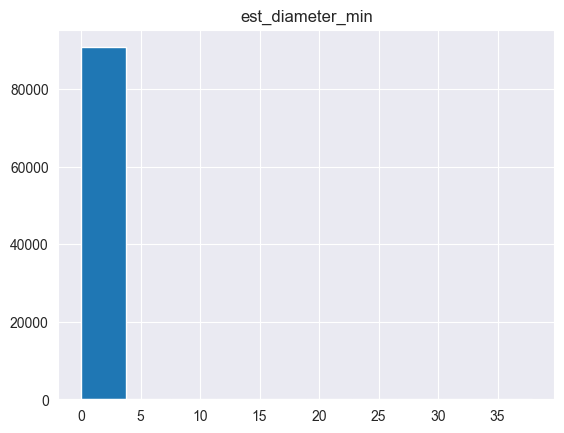

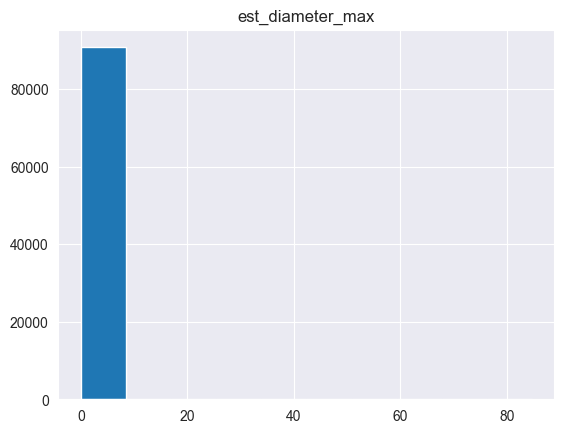

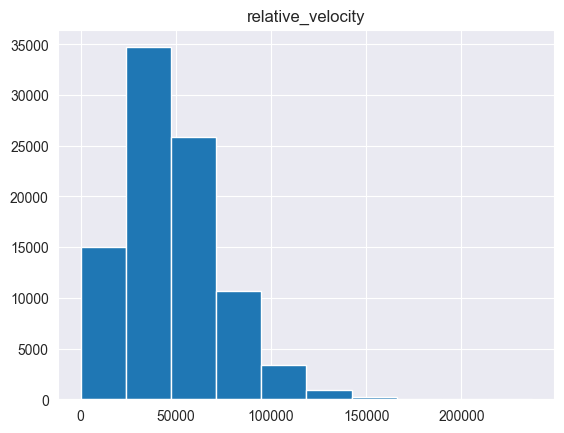

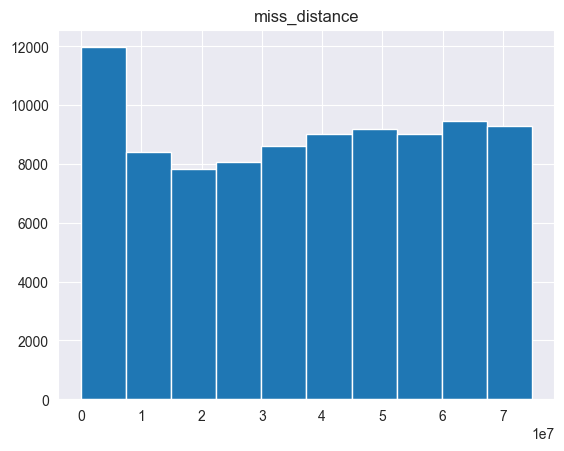

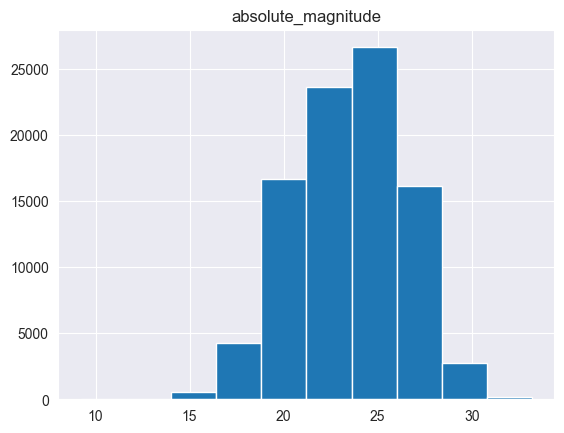

In [112]:
for column in columns:
    data.hist(column)


##### Заключение:
* Выбросы затрудняют чтение данных о магнитуде, расстоянии и относительной скорости
* На гистограмме данные магнитуды смещены вправо - это говорит о том, что среднее значение больше медианы
* На гистограмме данные относительной скорости смещены влево - это говорит о том, что среднее значение меньше медианы

### Изучение и обработка выбросов

In [113]:
outlier = data[["absolute_magnitude", "miss_distance", "relative_velocity"]]
outlier

,absolute_magnitude,miss_distance,relative_velocity
0,26.10,1.024333e+06,56014.078517
1,24.70,3.268186e+07,7864.348060
2,23.40,6.538636e+07,55257.544508
3,25.70,1.260796e+07,41531.404722
4,21.40,7.130590e+07,67639.394481
...,...,...,...
90831,25.90,1.635007e+06,23264.740825
90832,21.90,3.351901e+07,24802.519406
90833,24.40,5.471396e+07,116288.999548
90834,23.90,2.694877e+07,45763.317060


Определим нижние и верхние пределы для выбросов

In [114]:
q1 = outlier.quantile(0.25)
q1

absolute_magnitude    2.138000e+01
miss_distance         1.721082e+07
relative_velocity     2.871415e+04
Name: 0.25, dtype: float64

In [115]:
q3 = outlier.quantile(0.75)
q3

absolute_magnitude    2.570000e+01
miss_distance         5.654900e+07
relative_velocity     6.280491e+04
Name: 0.75, dtype: float64

In [117]:
iqr = q3 - q1
data_filtered = outlier[~((outlier < (q1 - 1.5 * iqr)) |(outlier > (q3 + 1.5 * iqr))).any(axis=1)]
data_filtered

,absolute_magnitude,miss_distance,relative_velocity
0,26.10,1.024333e+06,56014.078517
1,24.70,3.268186e+07,7864.348060
2,23.40,6.538636e+07,55257.544508
3,25.70,1.260796e+07,41531.404722
4,21.40,7.130590e+07,67639.394481
...,...,...,...
90830,27.50,3.821292e+06,8424.366481
90831,25.90,1.635007e+06,23264.740825
90832,21.90,3.351901e+07,24802.519406
90834,23.90,2.694877e+07,45763.317060


In [123]:
data_filtered = data[data.index.isin(data_filtered.index.values)]
data_filtered.head(15)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,year
0,3561024,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,0,2011
1,54016766,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,0,2020
2,3746620,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,0,2016
3,3633054,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,0,2013
4,3742124,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,0,2016
5,3395961,(2007 WU3),0.046191,0.103286,18933.875801,2.847083e+07,23.8,0,2007
6,3826808,(2018 PH22),0.116026,0.259442,43184.402732,3.418417e+07,21.8,0,2018
7,3339667,(2006 QV89),0.021113,0.047211,38064.802287,2.653154e+07,25.5,0,2006
8,3644044,(2013 LL31),0.221083,0.494356,33736.859964,5.670662e+07,20.4,0,2013
9,3655750,(2014 AC16),0.242412,0.542051,56188.215588,6.175441e+07,20.2,0,2014
